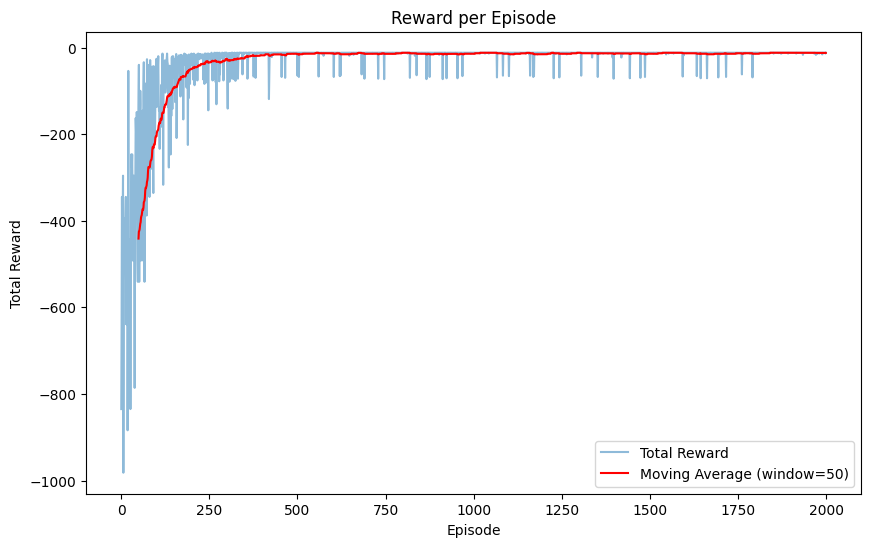

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

class CliffWalkingEnv:
    def __init__(self, width=12, height=4):
        self.width = width
        self.height = height
        self.start = (height - 1, 0)
        self.goal = (height - 1, width - 1)
        self.cliff = [(height - 1, i) for i in range(1, width - 1)]
        self.reset()

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        row, col = self.state
        if action == 0:  # up
            next_state = (max(row - 1, 0), col)
        elif action == 1:  # down
            next_state = (min(row + 1, self.height - 1), col)
        elif action == 2:  # left
            next_state = (row, max(col - 1, 0))
        elif action == 3:  # right
            next_state = (row, min(col + 1, self.width - 1))

        reward = -1
        if next_state in self.cliff:
            reward = -50  # Reduced cliff penalty
            next_state = self.start
        elif next_state == self.goal:
            reward = 0

        self.state = next_state
        return next_state, reward, next_state == self.goal

    def get_state_space(self):
        return self.height * self.width

    def get_action_space(self):
        return 4  # up, down, left, right

def q_learning_improved(env, episodes=2000, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.99, alpha_decay=0.9995, max_steps=100):
    q_table = np.zeros((env.get_state_space(), env.get_action_space()))

    def state_to_index(state):
        row, col = state
        return row * env.width + col

    rewards_per_episode = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False
        steps = 0

        # Decay epsilon and alpha
        epsilon = max(0.01, epsilon * epsilon_decay)
        alpha = max(0.01, alpha * alpha_decay)

        while not done and steps < max_steps:
            state_index = state_to_index(state)

            if random.uniform(0, 1) < epsilon:
                action = random.choice(range(env.get_action_space()))
            else:
                action = np.argmax(q_table[state_index])

            next_state, reward, done = env.step(action)
            next_state_index = state_to_index(next_state)

            # Q-Learning update rule
            q_table[state_index, action] = q_table[state_index, action] + \
                alpha * (reward + gamma * np.max(q_table[next_state_index]) - q_table[state_index, action])

            state = next_state
            total_reward += reward
            steps += 1

        rewards_per_episode.append(total_reward)

    return q_table, rewards_per_episode

def plot_rewards(rewards, window=50):
    # Calculate moving average
    moving_avg = np.convolve(rewards, np.ones(window)/window, mode='valid')

    plt.figure(figsize=(10, 6))
    plt.plot(rewards, alpha=0.5, label='Total Reward')
    plt.plot(range(window-1, len(rewards)), moving_avg, label=f'Moving Average (window={window})', color='red')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Reward per Episode')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    env = CliffWalkingEnv()
    improved_q_table, improved_rewards = q_learning_improved(env, episodes=2000)
    plot_rewards(improved_rewards, window=50)
